In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

Bad val 'TkAgg or echo backend : Agg' on line #1
	"backend : TkAgg or echo backend : Agg
"
	in file "/Users/apum/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'tkagg or echo backend : agg': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [2]:
data = pd.read_csv('hate-speech-labeled-corrected.csv', sep=';')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
di = {2:0}
data.replace({'label': di}, inplace=True)

data = data.iloc[:1500]

In [4]:
data.groupby('label').count()

,text
label,
0,1220
1,280


In [5]:
data.head()

,text,label
0,"Da, au infrant gheii. Fugi, Serbane, ca te alearga hoardele de pederasti si e vai de poponetul tau :))",1
1,Tricouri cu votez Da la referendum si apoi sa vorbim cu fiecare persoana despre referendum !!! Am speranta ca osa pastram familia naturala /casatoria naturala asa cum a lasat-o Dumnezeu !,1
2,Votez DA pentru Normalitate! Votez DA pentru FAMILIE!,1
3,"...:D...Chiar nu credeam ca exista atatia homosexuali in Romania!...:D... Citind comentariile, vad cu stupoare ca pomohacii jubileaza(sau ''juiseaza?!...) la vederea procentelor de sambata...:D... Dar, in totala lor dobitocie, nu realizeaza ca sambata toata lumea are si altceva de facut decat sa voteze. Duminica este ziua traditionala de mers la votare, asa ca toti pomohacii vor lua o muitza in cel mai curat stil romanesc...:D...",1
4,"Vorbiți cu atâta ușurință și ignoranță că nu vreți să votați modificarea art 48 al constituției care redefinește căsătoria că fiind uniunea liber consimțită între un bărbat și o femeie în loc de soți, căci fiecare dintre voi a avut parte de o mamă și un tată care v-au dat viață, nu ați crescut cu părinte 1 și părinte 2 de același sex, nu ați învățat la școală că sunteți de un gen superfluid, azi posibil băiat, peste un timp posibil fata, cu grave consecințe asupra psihicului tânărului care devine atât de confuz privind identitatea lui... Suntem direct răspunzători pentru generațiile viitoare acum, prin votul nostru!",1


In [6]:
data[data['label']==1]

,text,label
0,"Da, au infrant gheii. Fugi, Serbane, ca te alearga hoardele de pederasti si e vai de poponetul tau :))",1
1,Tricouri cu votez Da la referendum si apoi sa vorbim cu fiecare persoana despre referendum !!! Am speranta ca osa pastram familia naturala /casatoria naturala asa cum a lasat-o Dumnezeu !,1
2,Votez DA pentru Normalitate! Votez DA pentru FAMILIE!,1
3,"...:D...Chiar nu credeam ca exista atatia homosexuali in Romania!...:D... Citind comentariile, vad cu stupoare ca pomohacii jubileaza(sau ''juiseaza?!...) la vederea procentelor de sambata...:D... Dar, in totala lor dobitocie, nu realizeaza ca sambata toata lumea are si altceva de facut decat sa voteze. Duminica este ziua traditionala de mers la votare, asa ca toti pomohacii vor lua o muitza in cel mai curat stil romanesc...:D...",1
4,"Vorbiți cu atâta ușurință și ignoranță că nu vreți să votați modificarea art 48 al constituției care redefinește căsătoria că fiind uniunea liber consimțită între un bărbat și o femeie în loc de soți, căci fiecare dintre voi a avut parte de o mamă și un tată care v-au dat viață, nu ați crescut cu părinte 1 și părinte 2 de același sex, nu ați învățat la școală că sunteți de un gen superfluid, azi posibil băiat, peste un timp posibil fata, cu grave consecințe asupra psihicului tânărului care devine atât de confuz privind identitatea lui... Suntem direct răspunzători pentru generațiile viitoare acum, prin votul nostru!",1
5,Oamenii. cu gandire sanatoasa nu intra in capcana homosexualilor vom merge si ne vom sustine normalitatea,1
6,"Pro familie alcatuita din barbat si femeie asa cum este normal nu am nimic cu nimeni atata timp cat fiecare isi manifesta dorintele si orientarea in intimitate, dar din moment ce apar in societate cu asemenea comportament barbat cu barbat femeie cu femeie tulbura si ne mai miram de ce ne merge rau exista un singur raspuns Noi permitem asa ceva prin actiunile noastre. Daca vom continua asa vom ajunge precum locuitorii cetatilor biblice Sodoma si Gomora.",1
7,"Copii homosexuali se nasc din familii heterosexuale. Nu acesti copii aleg să fie homosexuali. La fel se nasc copii surzi, cu autism, cu nanism, cu piele colorată. Noi avem obligația sa-i înțelegem și sa-i iubim compasionat.",1
8,"Eu am votat pentru familia traditionala, biblica, biologica, pentru viitorul copiilor romani , pentru a nu se perverti inocenta lor. Pacat ca ceilalti romani nu au reusit sa inteleaga insemnatatea acestui referendum, nu avea nici o treaba cu politica ori cu biserica. Preotii si-au facut datoria sa il marturiseasca pe Hristos care a binecuvantat casatoria dintre un barbat si o femeie la nunta din Cana Galileiei. Acest referendum oprea Ong -urile straine de homosexuali sa isi faca de cap aici in tara folosindu-se de naivitatea unor romani fara credinta.",1
9,Invata sex pe copiii tai dar poate ca nu -i ai ca esti lesbiana,1


mean 196.85 std 319.51 max 7923.00
NOT-HATEFUL: mean 164.17 std 190.42 max 1978.00
HATEFUL: mean 339.26 std 604.19 max 7923.00


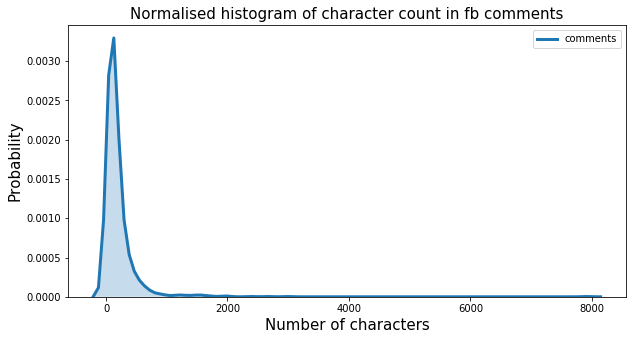

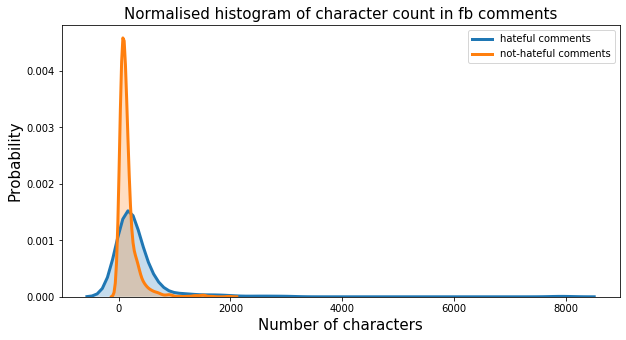

In [6]:
def character_count_hist(df):
    text = pd.Series(df['text'].tolist()).astype(str)

    dist_text = text.apply(len)
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_text, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, label='comments')
    plt.title('Normalised histogram of character count in fb comments', fontsize=15)
    plt.legend()
    plt.xlabel('Number of characters', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text.mean(), dist_text.std(), dist_text.max()))
    
def character_count_hist_label(df):
    text_label0 = pd.Series(df[df['label']==0]['text'].tolist()).astype(str)
    text_label1 = pd.Series(df[df['label']==1]['text'].tolist()).astype(str)

    dist_text_label0 = text_label0.apply(len)
    dist_text_label1 = text_label1.apply(len)
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_text_label1, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, label='hateful comments')
    sns.distplot(dist_text_label0, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, label='not-hateful comments')
    plt.title('Normalised histogram of character count in fb comments', fontsize=15)
    plt.legend()
    plt.xlabel('Number of characters', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('NOT-HATEFUL: mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text_label0.mean(), dist_text_label0.std(), dist_text_label0.max()))
    print('HATEFUL: mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text_label1.mean(), dist_text_label1.std(), dist_text_label1.max()))

    
character_count_hist(data)
character_count_hist_label(data)

mean 34.26 std 54.37 max 1321.00
NOT-HATEFUL: mean 28.76 std 32.44 max 334.00
HATEFUL: mean 58.24 std 102.83 max 1321.00


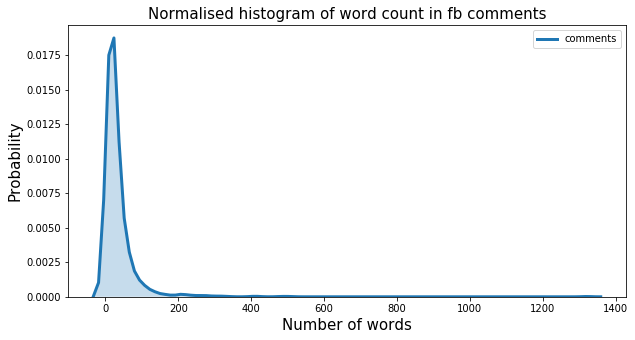

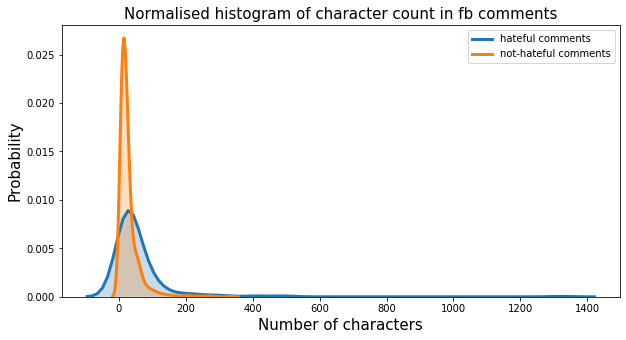

In [7]:
def word_count_hist(df):
    text = pd.Series(df['text'].tolist()).astype(str)

    dist_text = text.apply(lambda x: len(x.split(' ')))
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_text, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = 'comments')
    plt.title('Normalised histogram of word count in fb comments', fontsize=15)
    plt.legend()
    plt.xlabel('Number of words', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text.mean(), dist_text.std(), dist_text.max()))
    
def word_count_hist_label(df):
    text_label0 = pd.Series(df[df['label']==0]['text'].tolist()).astype(str)
    text_label1 = pd.Series(df[df['label']==1]['text'].tolist()).astype(str)

    dist_text_label0 = text_label0.apply(lambda x: len(x.split(' ')))
    dist_text_label1 = text_label1.apply(lambda x: len(x.split(' ')))
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_text_label1, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, label='hateful comments')
    sns.distplot(dist_text_label0, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, label='not-hateful comments')
    plt.title('Normalised histogram of character count in fb comments', fontsize=15)
    plt.legend()
    plt.xlabel('Number of characters', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('NOT-HATEFUL: mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text_label0.mean(), dist_text_label0.std(), dist_text_label0.max()))
    print('HATEFUL: mean {:.2f} std {:.2f} max {:.2f}'.format(dist_text_label1.mean(), dist_text_label1.std(), dist_text_label1.max()))


word_count_hist(data)
word_count_hist_label(data)

# Preprocess data

In [8]:
from spacy.lang.ro import Romanian

def remove_stops(row):
    nlp = Romanian()
    doc = nlp(row)
    keep = ['da', 'nu']
    sent = ' '.join(token.text for token in doc if (token.is_stop==False and (token.text not in keep)))
    return sent

import re

def preprocess_data(df, col):
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
    #remove emojis
    df[col] = df[col].apply(lambda x: re.sub('[\U00010000-\U0010ffff]', '', str(x)))
    #remove punctuation
    df[col] = df[col].str.replace('[^\w\s]','')
    #remove stop words
    df[col] = df[col].apply(lambda x: remove_stops(x))
    
    df = df[df[col] != '']
    return df

clean_data = preprocess_data(data, 'text')

In [9]:
clean_data.head()

,text,label
0,infrant gheii fugi serbane alearga hoardele pederasti vai poponetul tau,1
1,tricouri votez referendum vorbim persoana referendum speranta osa pastram familia naturala casatoria naturala lasato dumnezeu,1
2,votez normalitate votez familie,1
3,dchiar credeam exista homosexuali romaniad citind comentariile vad stupoare pomohacii jubileazasau juiseaza vederea procentelor sambatad totala dobitocie realizeaza sambata lumea facut decat voteze duminica ziua traditionala mers votare pomohacii lua muitza curat stil romanescd,1
4,vorbiți atâta ușurință ignoranță vreți votați modificarea art 48 constituției redefinește căsătoria fiind uniunea liber consimțită bărbat femeie loc soți parte mamă tată vau viață crescut părinte 1 părinte 2 același sex învățat școală gen superfluid posibil băiat posibil grave consecințe psihicului tânărului devine atât confuz privind identitatea direct răspunzători generațiile viitoare votul,1


In [16]:
clean_data[clean_data['text'].str.contains('votez da')]

,text,label
745,votez daașa ajute dumnezeu,0


# Co-occurence network

In [11]:
clean_data_label1 = clean_data[clean_data['label']==1]
clean_data_label0 = clean_data[clean_data['label']==0]

In [12]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords

def create_terms_bigram(clean_data):
    comments = clean_data['text'].tolist()

    # Create a sublist of lower case words for each tweet
    words_in_comment = [comment.lower().split() for comment in comments]

    # Create list of lists containing bigrams in tweets
    terms_bigram = [list(bigrams(comment)) for comment in words_in_comment]
    print(terms_bigram[0])
    print('\n')
    return terms_bigram
    
bigrams_label1 = create_terms_bigram(clean_data_label1)
bigrams_label0 = create_terms_bigram(clean_data_label0)

[('infrant', 'gheii'), ('gheii', 'fugi'), ('fugi', 'serbane'), ('serbane', 'alearga'), ('alearga', 'hoardele'), ('hoardele', 'pederasti'), ('pederasti', 'vai'), ('vai', 'poponetul'), ('poponetul', 'tau')]


[('simplu', 'vrea'), ('vrea', 'vada'), ('vada', 'vede'), ('vede', 'dracul'), ('dracul', 'dumnezeu'), ('dumnezeu', 'simplu'), ('simplu', 'vazut')]




In [13]:
import itertools
import collections
import networkx as nx

def create_bigram_counts(terms_bigram):
    # Flatten list of bigrams in clean tweets
    bigrams = list(itertools.chain(*terms_bigram))

    # Create counter of words in clean bigrams
    bigram_counts = collections.Counter(bigrams)

    print(bigram_counts.most_common(20))
    print('\n')
    return bigram_counts
    
bigram_counts_label1 = create_bigram_counts(bigrams_label1)
bigram_counts_label0 = create_bigram_counts(bigrams_label0)

[(('barbat', 'femeie'), 31), (('bărbat', 'femeie'), 23), (('casatoria', 'barbat'), 13), (('viitorul', 'copiilor'), 11), (('mue', 'psd'), 10), (('votez', 'familia'), 8), (('67', 'octombrie'), 7), (('7', 'octombrie'), 7), (('sodoma', 'gomora'), 6), (('familia', 'formată'), 6), (('familia', 'traditionala'), 5), (('dintrun', 'bărbat'), 5), (('merg', 'vot'), 5), (('mama', 'tata'), 5), (('frate', 'taci'), 5), (('taci', 'siasculta'), 5), (('siasculta', 'scobutil'), 5), (('același', 'sex'), 4), (('barbat', 'barbat'), 4), (('votăm', 'familia'), 4)]


[(('buletinul', 'vot'), 26), (('codul', 'civil'), 14), (('3', 'milioane'), 14), (('merg', 'vot'), 13), (('bărbat', 'femeie'), 13), (('familia', 'tradițională'), 10), (('familia', 'traditionala'), 10), (('barbat', 'femeie'), 8), (('pt', 'familie'), 7), (('monitorul', 'oficial'), 7), (('legea', 'revizuire'), 7), (('referendum', 'pt'), 6), (('buna', 'ziua'), 6), (('coalitia', 'familie'), 6), (('merge', 'vot'), 6), (('oameni', 'buni'), 6), (('merg', 'r

In [14]:
def create_bigram_df(bigram_counts):
    bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                                 columns=['bigram', 'count'])

    return bigram_df

bigram_df_label1 = create_bigram_df(bigram_counts_label1)
bigram_df_label0 = create_bigram_df(bigram_counts_label0)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


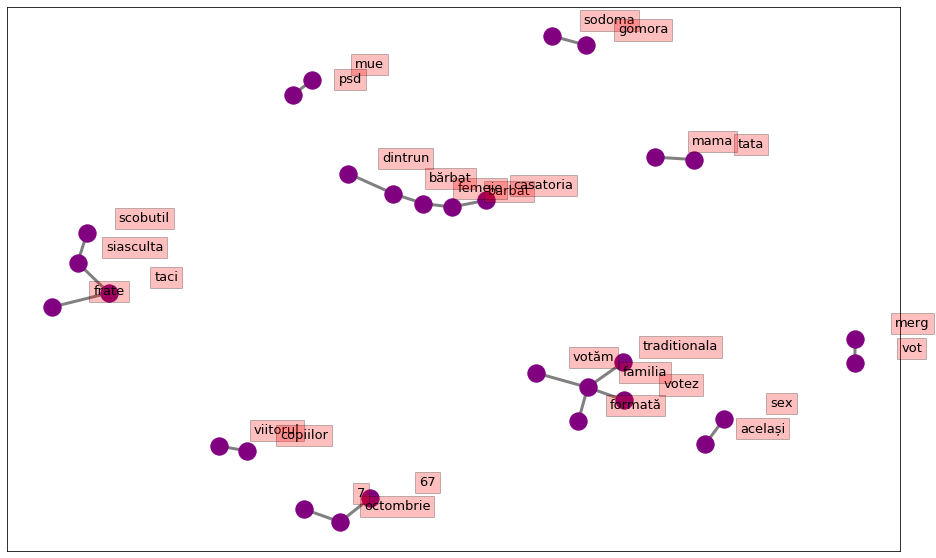

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


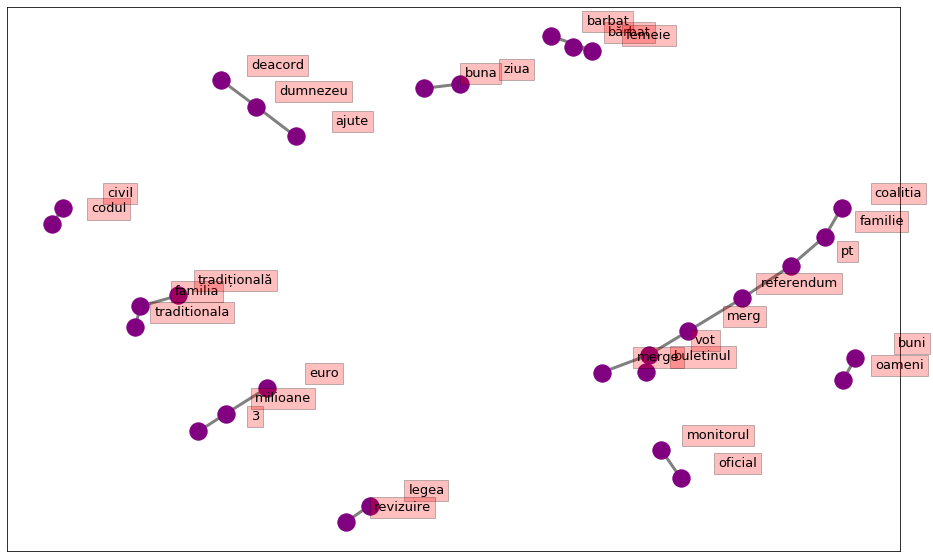

In [15]:
def create_cooccurence_graph(bigram_df):
    # Create dictionary of bigrams and their counts
    d = bigram_df.set_index('bigram').T.to_dict('records')
    # Create network plot 
    G = nx.Graph()

    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(16, 10))

    pos = nx.spring_layout(G, k=1)

    # Plot networks
    nx.draw_networkx(G, pos,
                     font_size=13,
                     width=3,
                     edge_color='grey',
                     node_color='purple',
                     with_labels = False,
                     ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='red', alpha=0.25),
                horizontalalignment='center', fontsize=13)

    plt.show()
    
create_cooccurence_graph(bigram_df_label1) 
create_cooccurence_graph(bigram_df_label0) 

In [55]:
data.rename(columns={'text':'sentence',
                    'label':'class'}, inplace=True)

In [56]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

df_train, df_dev = train_test_split(df_train, test_size=0.2, random_state=42)

In [57]:
df_train.to_csv('hate-speech-train.csv', index=False)
df_dev.to_csv('hate-speech-dev.csv', index=False)
df_test.to_csv('hate-speech-test.csv', index=False)

In [64]:
print(df_train.count())
df_train.groupby('class').count()

sentence    960
class       960
dtype: int64


,sentence
class,
0,783
1,177


In [65]:
print(df_dev.count())
df_dev.groupby('class').count()

sentence    240
class       240
dtype: int64


,sentence
class,
0,187
1,53


In [66]:
print(df_test.count())
df_test.groupby('class').count()

sentence    300
class       300
dtype: int64


,sentence
class,
0,250
1,50


In [63]:
aux = pd.read_csv('hate-speech-train.csv')
aux.head()

,sentence,class
0,3 mil semnatari,0
1,deschid urnele 25,0
2,afişajul electoral permis locuri decât stabilit acordul proprietarilor administratorilor caz deţinătorilorpe temei afost aplicata sanctiunea,0
3,3 milioane oameni semnătura undes răzgândit,0
4,adevaratele valori posibil platim scump merita dumnezeu binecuvinteze domn afacerea,1
